In [23]:
import json
import pandas as pd
import numpy as np

def extract_scores(data):
    ranking = []
    for k, v in data["results"].items():
        for k2, v2 in v.items():
            if k2 != "alias":
                v2 = v2 if v2 != "N/A" else np.nan
                ranking.append(
                    pd.DataFrame(index=[(k, k2)], data=[v2])
                )

    ranking = pd.concat(ranking).rename(columns={0:"score"}).astype(float)
    ranking.index = pd.MultiIndex.from_tuples(ranking.index)
    return ranking

with open('results/results.json') as f:
    data = json.load(f)

llama = extract_scores(data)

with open("results_openbio/results.json") as f:
    data_openbio = json.load(f)

openbio = extract_scores(data_openbio)

Text(0.5, 1.0, 'OpenBio 8B vs Llama 8B on Polish Eval')

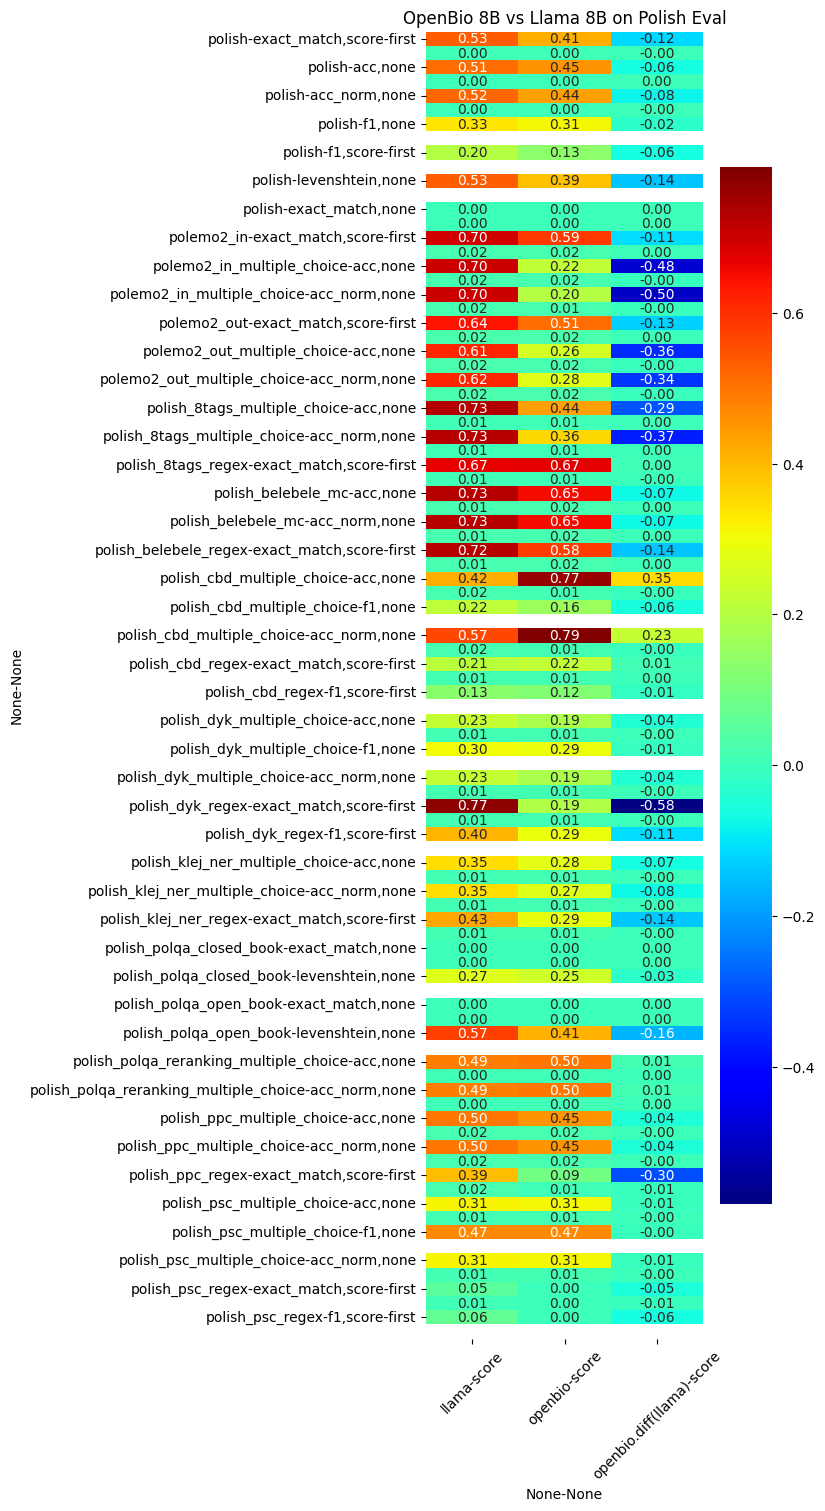

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

stacked = pd.concat([llama, openbio, (openbio - llama)], axis=1, keys=["llama", "openbio", "openbio.diff(llama)"])

plt.figure(figsize=(8, 15))
sns.heatmap(stacked, annot=True, fmt=".2f", cmap="jet")

plt.xticks(rotation=45)
plt.tight_layout()

plt.title("OpenBio 8B vs Llama 8B on Polish Eval")

<Axes: >

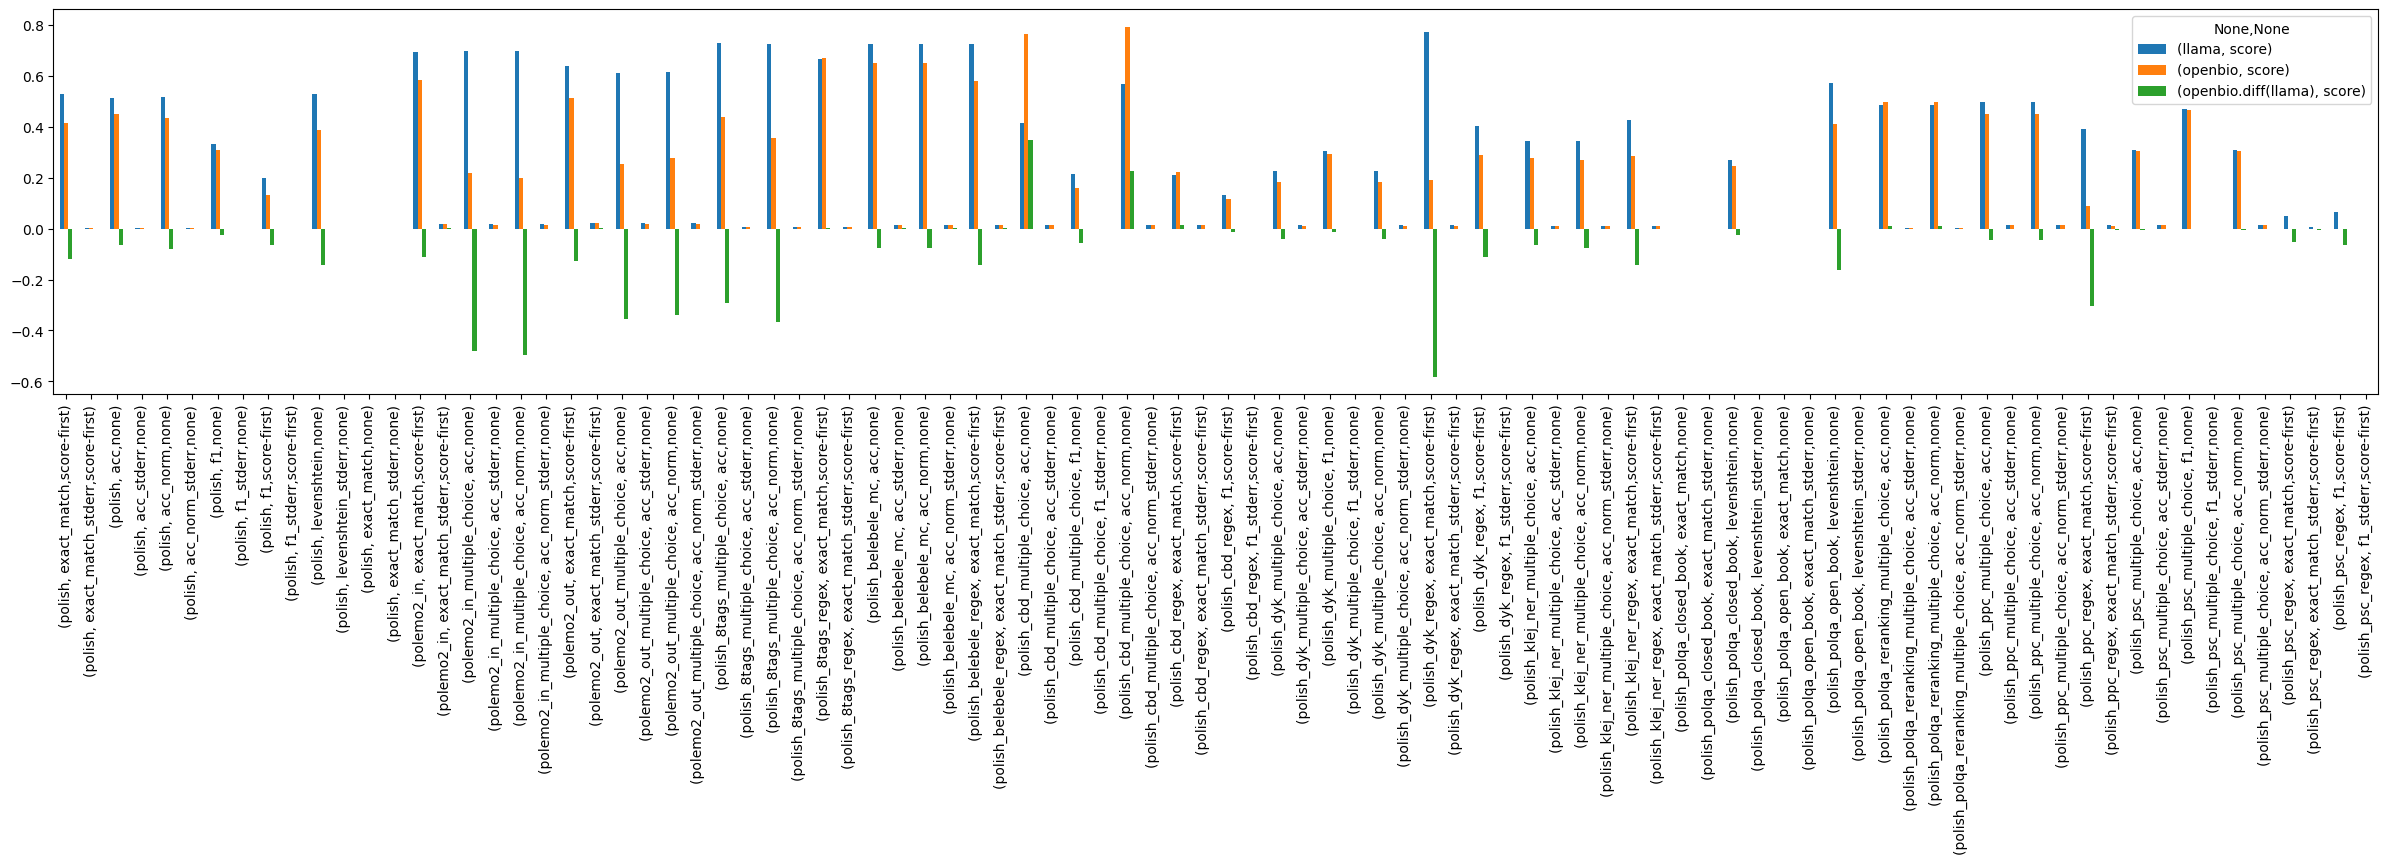

In [48]:
stacked.plot.bar(figsize=(30, 5))

In [53]:
stacked.reset_index(drop=True)

,llama,openbio,openbio.diff(llama)
,score,score,score
0,0.531257,0.413973,-0.117284
1,0.003999,0.003808,-0.000192
2,0.513721,0.450635,-0.063087
3,0.003017,0.003029,0.000012
4,0.518808,0.437189,-0.081618
...,...,...,...
87,0.014102,0.014032,-0.000071
88,0.051948,0.000000,-0.051948
89,0.006762,0.000000,-0.006762
